<font face=georgia color=magenta><h1><center>Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pycountry_convert import convert_continent_code_to_continent_name,country_alpha2_to_continent_code,country_name_to_country_alpha2
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score

<font face=georgia color=magenta><h1><center>EDA & Data Cleaning

In [2]:
df = pd.read_csv('Task2-dataset/customer_booking.csv', encoding='latin1')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

<font face=georgia color=yellow><h3><center>No Null Records

In [4]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


<font face=georgia color=white><h5><center>Outliers can be seen as the difference between 75% data and max value is large.

In [5]:
df[df.duplicated()]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
196,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
316,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
384,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
456,1,Internet,RoundTrip,30,85,15,Fri,AKLKUL,Malaysia,1,0,0,8.83,1
513,3,Internet,RoundTrip,109,20,4,Tue,AKLKUL,Singapore,1,0,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49852,2,Internet,RoundTrip,204,6,14,Tue,PENTPE,Malaysia,1,0,0,4.67,0
49902,1,Mobile,RoundTrip,106,6,11,Fri,PENTPE,Taiwan,1,0,0,4.67,0
49934,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0
49944,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0


<font face=georgia color=yellow><h3><center>Dropping duplicate records

In [6]:
df = df.drop_duplicates()
df.reset_index()
print('New shape : ', df.shape)
df.head()

New shape :  (49281, 14)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


<font face=georgia color=yellow><h3><center>Target Distribution

In [7]:
target_dist = df['booking_complete'].value_counts().to_dict()
target_dist

{0: 41890, 1: 7391}

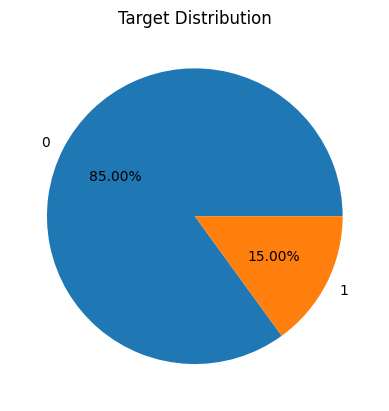

In [8]:
plt.pie(x=target_dist.values(), labels=target_dist.keys(), autopct='%.2f%%')
plt.title('Target Distribution')
plt.show()

<font face=georgia color=white><h5><center>There is imbalance within class but since this is a real world data set I would prefer to not add synthetic data to it to balance the class.

<font face=georgia color=yellow><h3><center>Seperating Categoric and Numeric features

In [9]:
numeric_data = df.select_dtypes(include=['int', 'float'])
print('Numeric data shape : ', numeric_data.shape)
numeric_data.head()

Numeric data shape :  (49281, 9)


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0


In [10]:
categoric_data = df.select_dtypes(include=['object'])
print('Categoric data shape : ', categoric_data.shape)
categoric_data.head()

Categoric data shape :  (49281, 5)


,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India


<font face=georgia color=yellow><h3><center>Visualizing Features Distribution

c:\Users\antho\OneDrive\Desktop\N2\AI\Git_repositories\Forage-British_Airways_Job_Simulation_Projects\ba_airways_jobsim\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


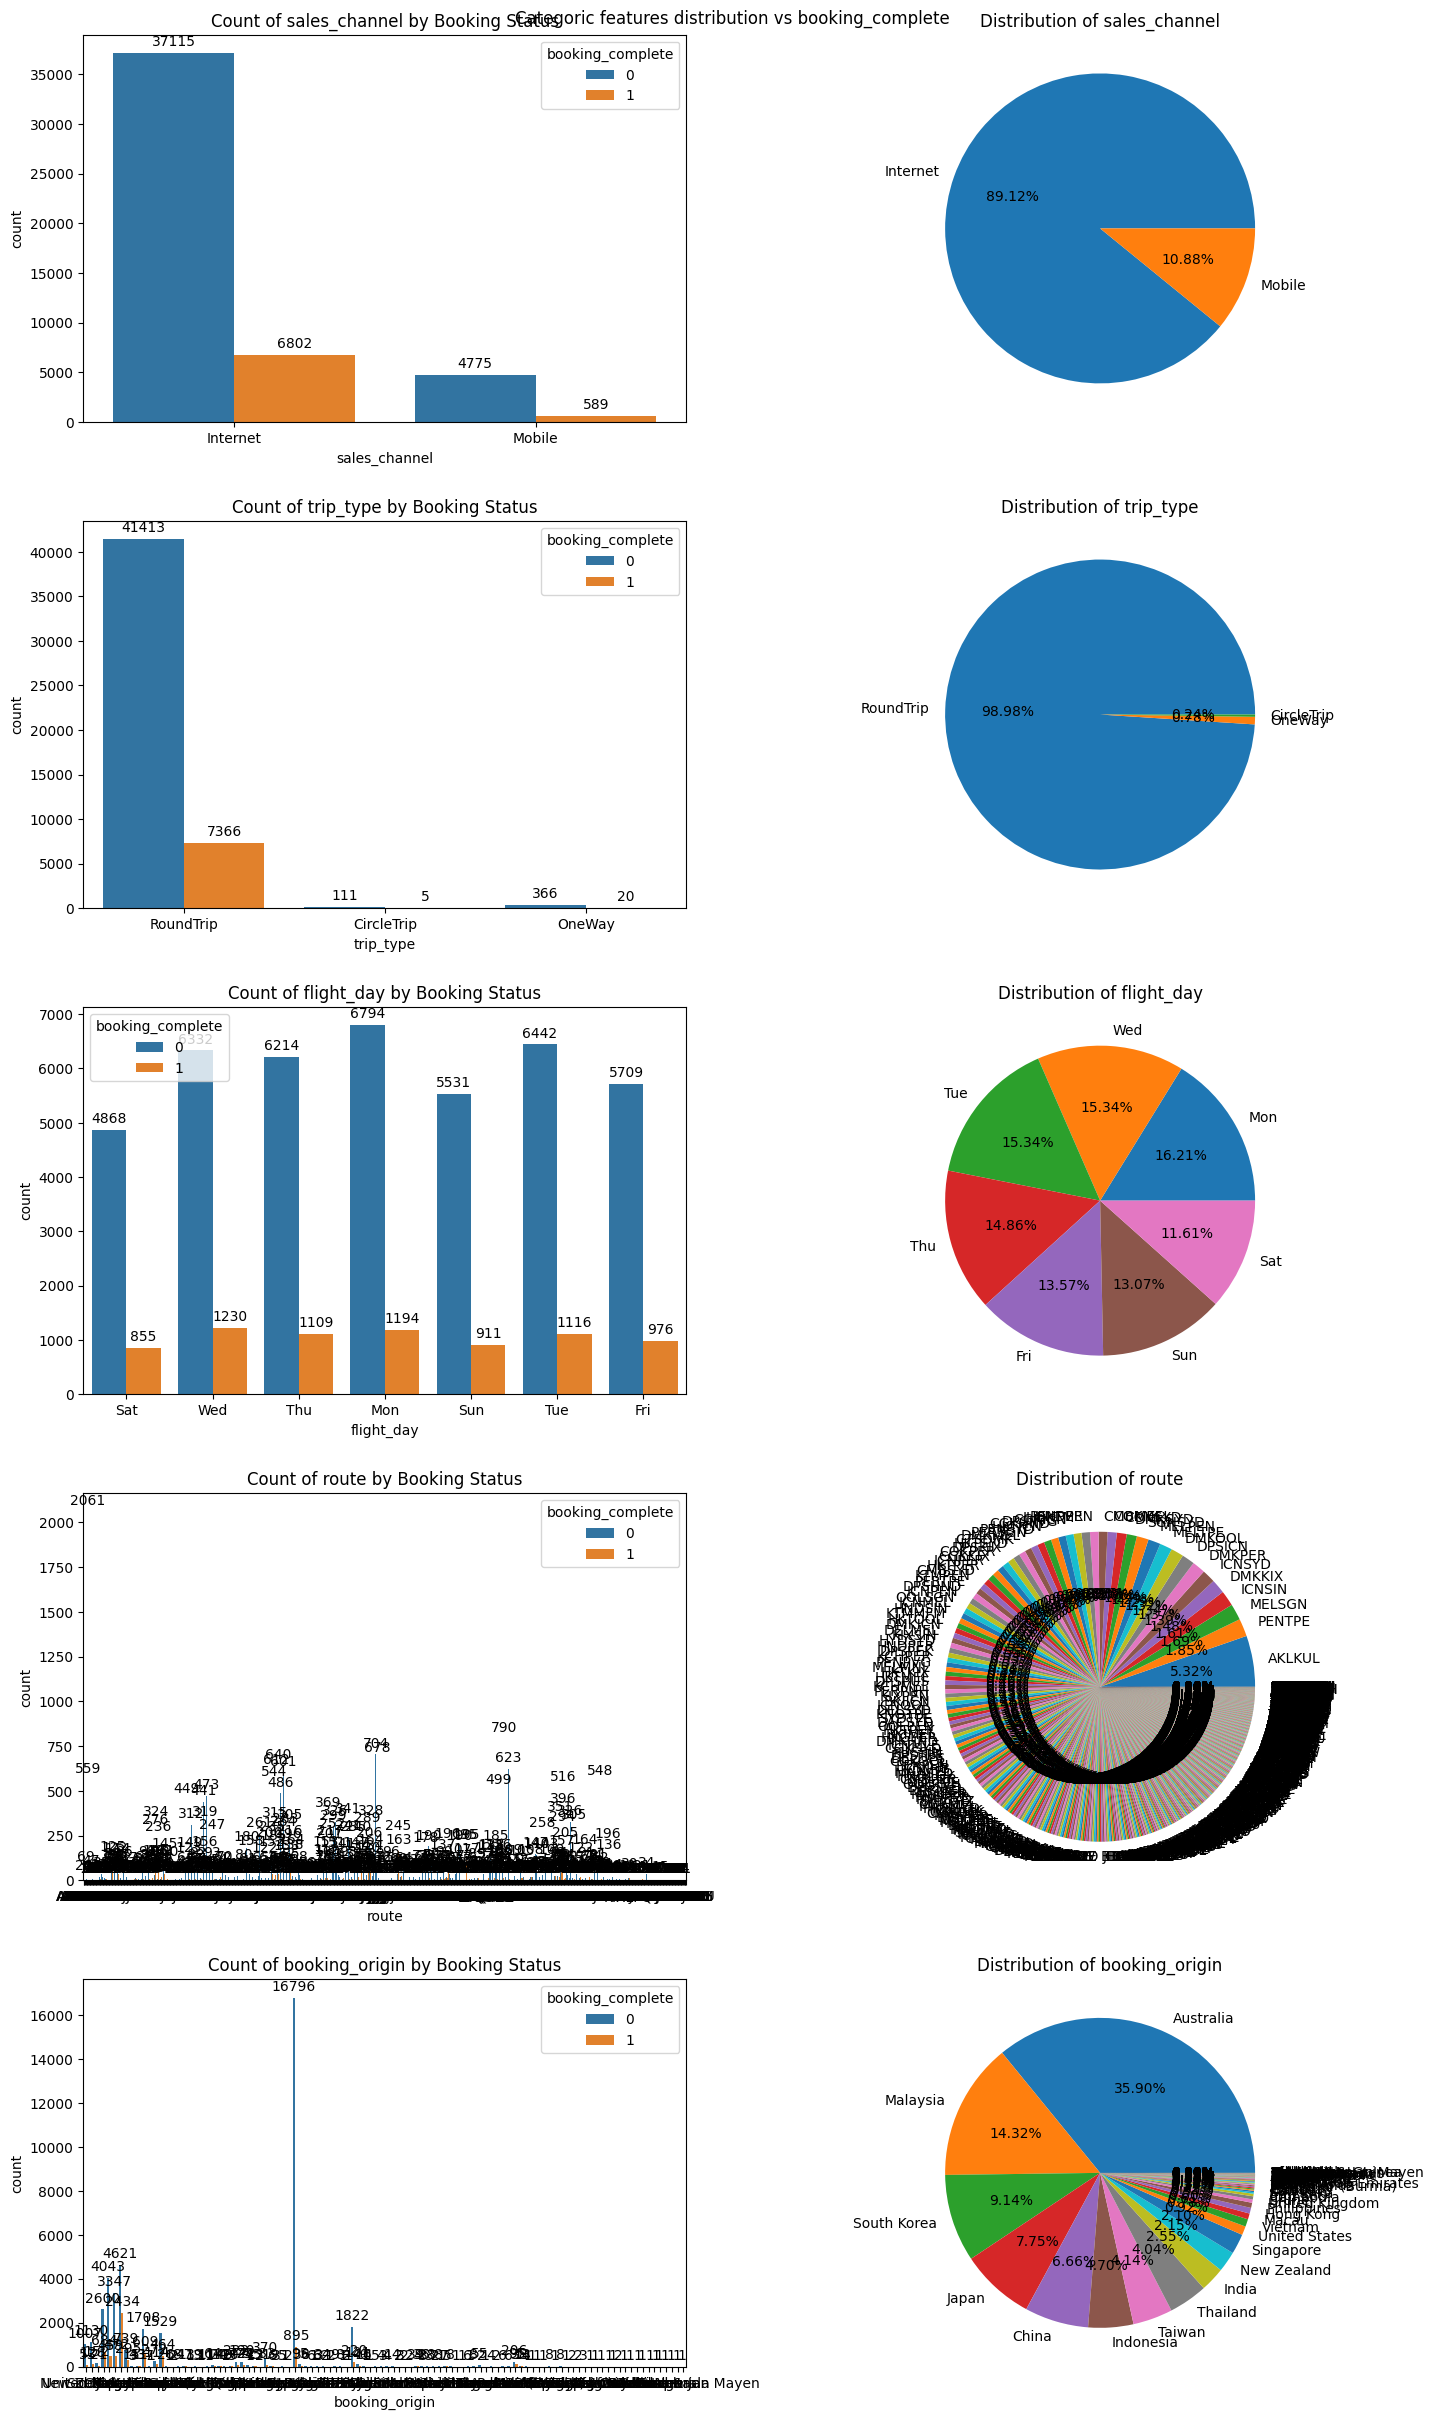

In [11]:
categoric_features = categoric_data.columns

fig, axes = plt.subplots(nrows=len(categoric_features), ncols=2, figsize=(15, 5 * len(categoric_features)))
fig.tight_layout(pad=5.0) 

for id, col in enumerate(categoric_features):
    ax_count = sns.countplot(x=categoric_data[col], hue=df['booking_complete'], ax=axes[id][0])
    axes[id][0].set_title(f'Count of {col} by Booking Status') 

    for container in ax_count.containers:
        ax_count.bar_label(container, fmt='%d', label_type='edge', padding=3) 

    axes[id][1].pie(x=categoric_data[col].value_counts().to_dict().values(),
                    labels=categoric_data[col].value_counts().to_dict().keys(),
                    autopct='%.2f%%')
    axes[id][1].set_title(f'Distribution of {col}')
plt.suptitle('Categoric features distribution vs booking_complete')
plt.show()

<font face=georgia color=white><h5><center>Dropping 'trip_type' feature due to high imbalance(99% single category)

In [12]:
categoric_data = categoric_data.drop(columns=['trip_type'])
print('New shape : ',categoric_data.shape)
categoric_data.head()

New shape :  (49281, 4)


,sales_channel,flight_day,route,booking_origin
0,Internet,Sat,AKLDEL,New Zealand
1,Internet,Sat,AKLDEL,New Zealand
2,Internet,Wed,AKLDEL,India
3,Internet,Sat,AKLDEL,New Zealand
4,Internet,Wed,AKLDEL,India


<font face=georgia color=magenta><h1><center>Feature Engineering

In [13]:
categoric_data['flight_from'], categoric_data['flight_to'] = categoric_data['route'].str[:3], categoric_data['route'].str[3:]
categoric_data

,sales_channel,flight_day,route,booking_origin,flight_from,flight_to
0,Internet,Sat,AKLDEL,New Zealand,AKL,DEL
1,Internet,Sat,AKLDEL,New Zealand,AKL,DEL
2,Internet,Wed,AKLDEL,India,AKL,DEL
3,Internet,Sat,AKLDEL,New Zealand,AKL,DEL
4,Internet,Wed,AKLDEL,India,AKL,DEL
...,...,...,...,...,...,...
49995,Internet,Sat,PERPNH,Australia,PER,PNH
49996,Internet,Sun,PERPNH,Australia,PER,PNH
49997,Internet,Sat,PERPNH,Australia,PER,PNH
49998,Internet,Mon,PERPNH,Australia,PER,PNH


In [14]:
print('flight_from : Total Uniques -', len(categoric_data['flight_from'].unique()))
print(categoric_data['flight_from'].unique())
print('flight_to : Total Uniques -', len(categoric_data['flight_to'].unique()))
print(categoric_data['flight_to'].unique())

flight_from : Total Uniques - 85
['AKL' 'AOR' 'BBI' 'BDO' 'BKI' 'BLR' 'BOM' 'BTJ' 'BTU' 'BWN' 'CAN' 'CCU'
 'CEB' 'CGK' 'CKG' 'CMB' 'CNX' 'COK' 'CRK' 'CSX' 'CTS' 'CTU' 'CXR' 'DAC'
 'DAD' 'DEL' 'DMK' 'DPS' 'GOI' 'HAN' 'HDY' 'HGH' 'HKG' 'HKT' 'HND' 'HYD'
 'ICN' 'IKA' 'JED' 'JHB' 'JOG' 'KBR' 'KBV' 'KCH' 'KHH' 'KIX' 'KLO' 'KNO'
 'KOS' 'KTM' 'KWL' 'LBU' 'LGK' 'LOP' 'LPQ' 'MAA' 'MEL' 'MFM' 'MLE' 'MNL'
 'MRU' 'MYY' 'NRT' 'OOL' 'PEK' 'PEN' 'PER' 'PNH' 'PNK' 'PUS' 'PVG' 'REP'
 'RGN' 'SBW' 'SDK' 'SGN' 'SIN' 'SRG' 'SUB' 'SYD' 'TGG' 'TPE' 'TRZ' 'TWU'
 'URT']
flight_to : Total Uniques - 64
['DEL' 'HGH' 'HND' 'ICN' 'KIX' 'KTM' 'KUL' 'MRU' 'PEK' 'PVG' 'TPE' 'MEL'
 'OOL' 'PER' 'SYD' 'CTS' 'CTU' 'IKA' 'PUS' 'XIY' 'CKG' 'JED' 'WUH' 'COK'
 'DPS' 'JHB' 'KCH' 'LOP' 'MAA' 'MYY' 'PEN' 'PNH' 'SBW' 'SIN' 'SUB' 'TGG'
 'TRZ' 'TWU' 'DMK' 'HKT' 'KBR' 'KNO' 'LGK' 'SGN' 'KBV' 'HKG' 'JOG' 'MFM'
 'MNL' 'SZX' 'MLE' 'REP' 'RGN' 'SDK' 'VTZ' 'PDG' 'URT' 'SWA' 'UTP' 'VTE'
 'LPQ' 'LBU' 'NRT' 'SRG']


<font face=georgia color=white><h5><center>Grouping routes and countries into regions

In [15]:
country_mapping = {
    'AKL': 'New Zealand',
    'AOR': 'Malaysia',
    'BBI': 'India',
    'BDO': 'Indonesia',
    'BKI': 'Malaysia',
    'BLR': 'India',
    'BOM': 'India',
    'BTJ': 'Indonesia',
    'BTU': 'Malaysia',
    'BWN': 'Brunei',
    'CAN': 'China',
    'CCU': 'India',
    'CEB': 'Philippines',
    'CGK': 'Indonesia',
    'CKG': 'China',
    'CMB': 'Sri Lanka',
    'CNX': 'Thailand',
    'COK': 'India',
    'CRK': 'Philippines',
    'CSX': 'China',
    'CTS': 'Japan',
    'CTU': 'China',
    'CXR': 'Vietnam',
    'DAC': 'Bangladesh',
    'DAD': 'Vietnam',
    'DEL': 'India',
    'DMK': 'Thailand',
    'DPS': 'Indonesia',
    'GOI': 'India',
    'HAN': 'Vietnam',
    'HDY': 'Thailand',
    'HGH': 'China',
    'HKG': 'Hong Kong',
    'HKT': 'Thailand',
    'HND': 'Japan',
    'HYD': 'India',
    'ICN': 'South Korea',
    'IKA': 'Iran',
    'JED': 'Saudi Arabia',
    'JHB': 'Malaysia',
    'JOG': 'Indonesia',
    'KBR': 'Malaysia',
    'KBV': 'Thailand',
    'KCH': 'Malaysia',
    'KHH': 'Taiwan',
    'KIX': 'Japan',
    'KLO': 'India',
    'KNO': 'Indonesia',
    'KOS': 'Thailand',
    'KTM': 'Nepal',
    'KWL': 'China',
    'LBU': 'Malaysia',
    'LGK': 'Malaysia',
    'LOP': 'Indonesia',
    'LPQ': 'Laos',
    'MAA': 'India',
    'MEL': 'Australia',
    'MFM': 'Macau',
    'MLE': 'Maldives',
    'MNL': 'Philippines',
    'MRU': 'Mauritius',
    'MYY': 'Malaysia',
    'NRT': 'Japan',
    'OOL': 'Australia',
    'PEK': 'China',
    'PEN': 'Malaysia',
    'PER': 'Australia',
    'PNH': 'Cambodia',
    'PNK': 'Indonesia',
    'PUS': 'South Korea',
    'PVG': 'China',
    'REP': 'Cambodia',
    'RGN': 'Myanmar',
    'SBW': 'Malaysia',
    'SDK': 'Malaysia',
    'SGN': 'Vietnam',
    'SIN': 'Singapore',
    'SRG': 'Indonesia',
    'SUB': 'Indonesia',
    'SYD': 'Australia',
    'TGG': 'Malaysia',
    'TPE': 'Taiwan',
    'TRZ': 'India',
    'TWU': 'Malaysia',
    'URT': 'Thailand',
    'KUL': 'Malaysia',
    'XIY': 'China',
    'WUH': 'China',
    'SZX': 'China',
    'VTZ': 'India',
    'PDG': 'Indonesia',
    'SWA': 'China',
    'UTP': 'Thailand',
    'VTE': 'Laos'
}

In [16]:
def airport_region_mapper(airport_code, country_mapping=country_mapping):
    if airport_code in country_mapping.keys():
        country_name = country_mapping[airport_code]
        return country_name
    return airport_code 

In [17]:
categoric_data['flight_from_region'] = categoric_data['flight_from'].map(airport_region_mapper)
categoric_data['flight_to_region'] = categoric_data['flight_to'].map(airport_region_mapper)
categoric_data

,sales_channel,flight_day,route,booking_origin,flight_from,flight_to,flight_from_region,flight_to_region
0,Internet,Sat,AKLDEL,New Zealand,AKL,DEL,New Zealand,India
1,Internet,Sat,AKLDEL,New Zealand,AKL,DEL,New Zealand,India
2,Internet,Wed,AKLDEL,India,AKL,DEL,New Zealand,India
3,Internet,Sat,AKLDEL,New Zealand,AKL,DEL,New Zealand,India
4,Internet,Wed,AKLDEL,India,AKL,DEL,New Zealand,India
...,...,...,...,...,...,...,...,...
49995,Internet,Sat,PERPNH,Australia,PER,PNH,Australia,Cambodia
49996,Internet,Sun,PERPNH,Australia,PER,PNH,Australia,Cambodia
49997,Internet,Sat,PERPNH,Australia,PER,PNH,Australia,Cambodia
49998,Internet,Mon,PERPNH,Australia,PER,PNH,Australia,Cambodia


In [18]:
from pycountry_convert import country_name_to_country_alpha2, country_alpha2_to_continent_code, convert_continent_code_to_continent_name

def country_to_continent(country_name):
    try : 
        country_alpha2 = country_name_to_country_alpha2(country_name)
        continent_code = country_alpha2_to_continent_code(country_alpha2)
        continent_name = convert_continent_code_to_continent_name(continent_code) 
    except KeyError : 
        continent_name = country_name
    return continent_name

categoric_data['flight_from_region'] = categoric_data['flight_from_region'].map(country_to_continent)
categoric_data['flight_to_region'] = categoric_data['flight_to_region'].map(country_to_continent)
categoric_data

,sales_channel,flight_day,route,booking_origin,flight_from,flight_to,flight_from_region,flight_to_region
0,Internet,Sat,AKLDEL,New Zealand,AKL,DEL,Oceania,Asia
1,Internet,Sat,AKLDEL,New Zealand,AKL,DEL,Oceania,Asia
2,Internet,Wed,AKLDEL,India,AKL,DEL,Oceania,Asia
3,Internet,Sat,AKLDEL,New Zealand,AKL,DEL,Oceania,Asia
4,Internet,Wed,AKLDEL,India,AKL,DEL,Oceania,Asia
...,...,...,...,...,...,...,...,...
49995,Internet,Sat,PERPNH,Australia,PER,PNH,Oceania,Asia
49996,Internet,Sun,PERPNH,Australia,PER,PNH,Oceania,Asia
49997,Internet,Sat,PERPNH,Australia,PER,PNH,Oceania,Asia
49998,Internet,Mon,PERPNH,Australia,PER,PNH,Oceania,Asia


In [19]:
print('flight_from_region : Total Uniques -', len(categoric_data['flight_from_region'].unique()),categoric_data['flight_from_region'].unique())
print(categoric_data['flight_from_region'].value_counts())
print('flight_to_region : Total Uniques -', len(categoric_data['flight_to_region'].unique()),categoric_data['flight_to_region'].unique())
print(categoric_data['flight_to_region'].value_counts())

flight_from_region : Total Uniques - 3 ['Oceania' 'Asia' 'Africa']
flight_from_region
Asia       40008
Oceania     9136
Africa       137
Name: count, dtype: int64
flight_to_region : Total Uniques - 3 ['Asia' 'Africa' 'Oceania']
flight_to_region
Asia       30446
Oceania    18651
Africa       184
Name: count, dtype: int64


In [20]:
categoric_data = categoric_data.drop(columns=['flight_from', 'flight_to', 'route'])
print('New Shape : ',categoric_data.shape)
categoric_data.head()

New Shape :  (49281, 5)


,sales_channel,flight_day,booking_origin,flight_from_region,flight_to_region
0,Internet,Sat,New Zealand,Oceania,Asia
1,Internet,Sat,New Zealand,Oceania,Asia
2,Internet,Wed,India,Oceania,Asia
3,Internet,Sat,New Zealand,Oceania,Asia
4,Internet,Wed,India,Oceania,Asia


In [21]:
countries = categoric_data['booking_origin'].unique()
countries.sort()
countries

array(['(not set)', 'Afghanistan', 'Algeria', 'Argentina', 'Australia',
       'Austria', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Bhutan',
       'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Canada', 'Chile',
       'China', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic',
       'Czechia', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France',
       'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guam', 'Guatemala',
       'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kuwait', 'Laos', 'Lebanon', 'Macau', 'Malaysia',
       'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Mongolia',
       'Myanmar (Burma)', 'Nepal', 'Netherlands', 'New Caledonia',
       'New Zealand', 'Nicaragua', 'Norfolk Island', 'Norway', 'Oman',
       'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
       'Réunion', 'Saudi A

In [22]:
categoric_data['booking_origin'] = categoric_data['booking_origin'].apply(country_to_continent)
categoric_data

,sales_channel,flight_day,booking_origin,flight_from_region,flight_to_region
0,Internet,Sat,Oceania,Oceania,Asia
1,Internet,Sat,Oceania,Oceania,Asia
2,Internet,Wed,Asia,Oceania,Asia
3,Internet,Sat,Oceania,Oceania,Asia
4,Internet,Wed,Asia,Oceania,Asia
...,...,...,...,...,...
49995,Internet,Sat,Oceania,Oceania,Asia
49996,Internet,Sun,Oceania,Oceania,Asia
49997,Internet,Sat,Oceania,Oceania,Asia
49998,Internet,Mon,Oceania,Oceania,Asia


In [23]:
print('booking_origin : Total Uniques -', len(categoric_data['booking_origin'].unique()),categoric_data['booking_origin'].unique())
print(categoric_data['booking_origin'].value_counts())

booking_origin : Total Uniques - 10 ['Oceania' 'Asia' 'Europe' 'Africa' '(not set)' 'North America'
 'South America' 'Timor-Leste' 'Myanmar (Burma)' 'Svalbard & Jan Mayen']
booking_origin
Asia                    29182
Oceania                 18765
Europe                    571
North America             522
(not set)                  78
Africa                     68
Myanmar (Burma)            51
South America              41
Timor-Leste                 2
Svalbard & Jan Mayen        1
Name: count, dtype: int64


In [24]:
categoric_data['booking_origin'] = categoric_data['booking_origin'].map({'Asia':'Asia', 'Oceania':'Oceania','Europe': 'Europe','North America':'North America', 'Africa' : 'Other', 'South America': 'Other', 'Svalbard & Jan Mayen':'Other', 'Timor-Leste':'Asia', 'Myanmar (Burma)':'Asia', '(not set)':'Other'})
categoric_data['booking_origin'].value_counts()

booking_origin
Asia             29235
Oceania          18765
Europe             571
North America      522
Other              188
Name: count, dtype: int64

In [25]:
print('booking_origin : Total Uniques -', len(categoric_data['booking_origin'].unique()),categoric_data['booking_origin'].unique())
print(categoric_data['booking_origin'].value_counts())

booking_origin : Total Uniques - 5 ['Oceania' 'Asia' 'Europe' 'Other' 'North America']
booking_origin
Asia             29235
Oceania          18765
Europe             571
North America      522
Other              188
Name: count, dtype: int64


In [26]:
print('New Shape : ',categoric_data.shape)
categoric_data.head()

New Shape :  (49281, 5)


,sales_channel,flight_day,booking_origin,flight_from_region,flight_to_region
0,Internet,Sat,Oceania,Oceania,Asia
1,Internet,Sat,Oceania,Oceania,Asia
2,Internet,Wed,Asia,Oceania,Asia
3,Internet,Sat,Oceania,Oceania,Asia
4,Internet,Wed,Asia,Oceania,Asia


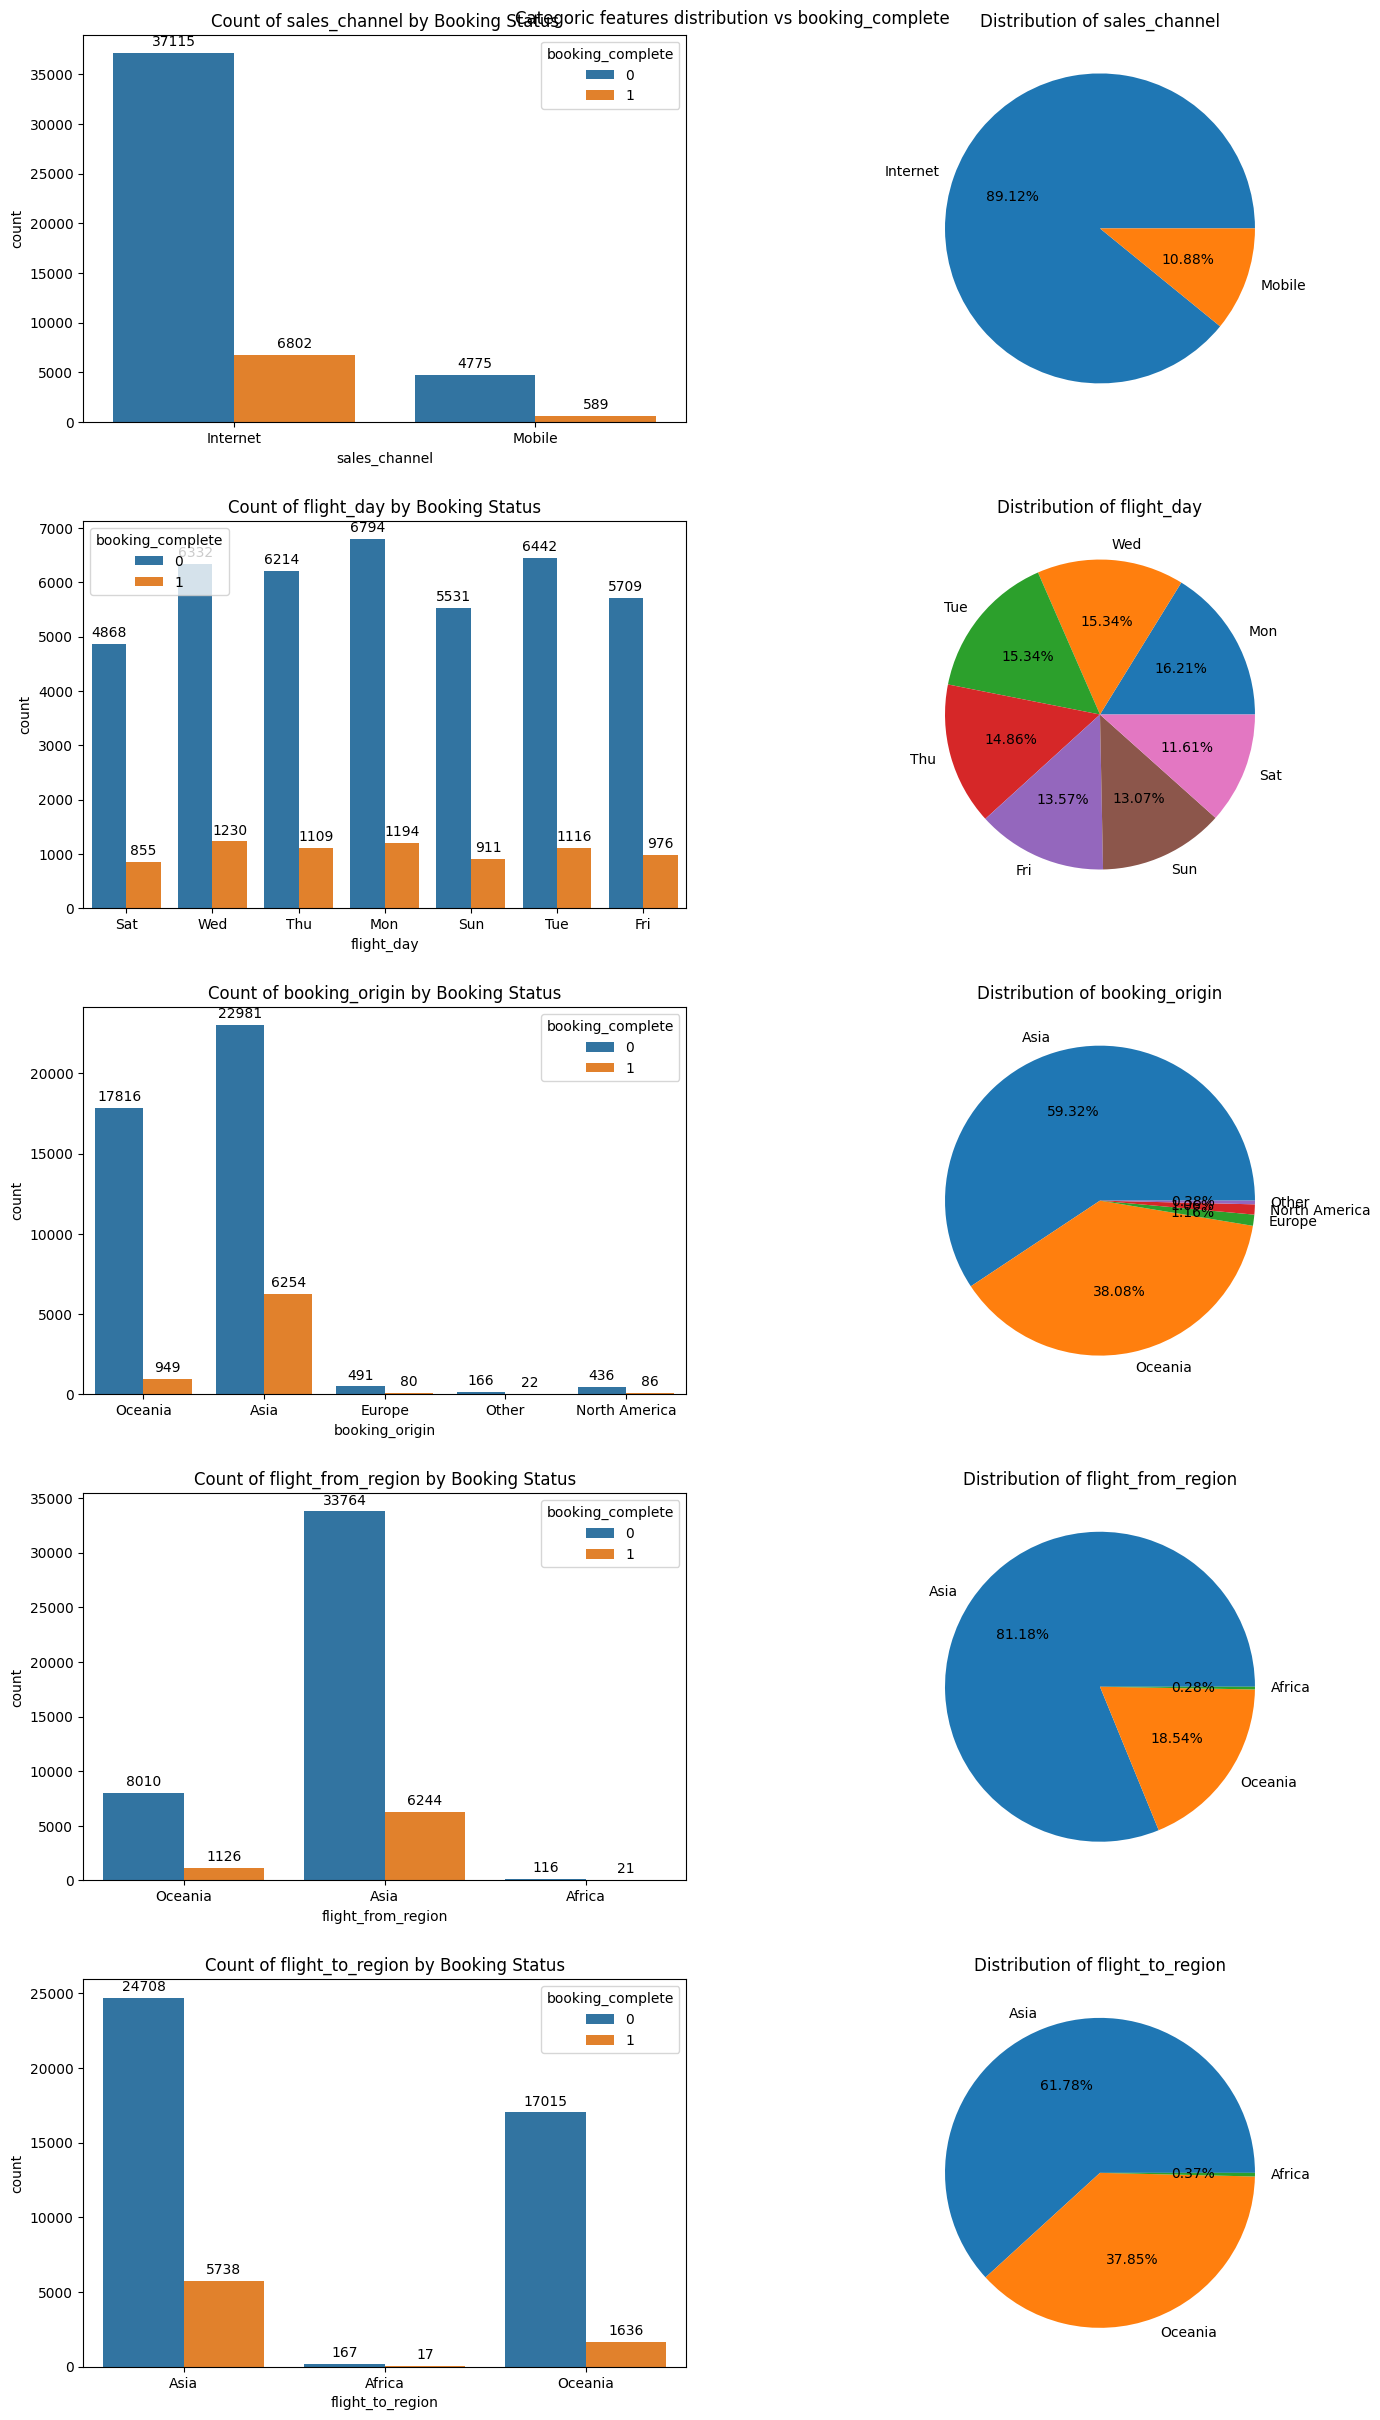

In [27]:
categoric_features = categoric_data.columns

fig, axes = plt.subplots(nrows=len(categoric_features), ncols=2, figsize=(15, 5 * len(categoric_features)))
fig.tight_layout(pad=5.0) 

for id, col in enumerate(categoric_features):
    ax_count = sns.countplot(x=categoric_data[col], hue=df['booking_complete'], ax=axes[id][0])
    axes[id][0].set_title(f'Count of {col} by Booking Status') 

    for container in ax_count.containers:
        ax_count.bar_label(container, fmt='%d', label_type='edge', padding=3) 

    axes[id][1].pie(x=categoric_data[col].value_counts().to_dict().values(),
                    labels=categoric_data[col].value_counts().to_dict().keys(),
                    autopct='%.2f%%')
    axes[id][1].set_title(f'Distribution of {col}')
plt.suptitle('Categoric features distribution vs booking_complete')
plt.show()

<font face=georgia color=yellow><h3><center>Exploring Numeric features

In [28]:
print('New Shape : ',numeric_data.shape)
numeric_data.head()

New Shape :  (49281, 9)


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0


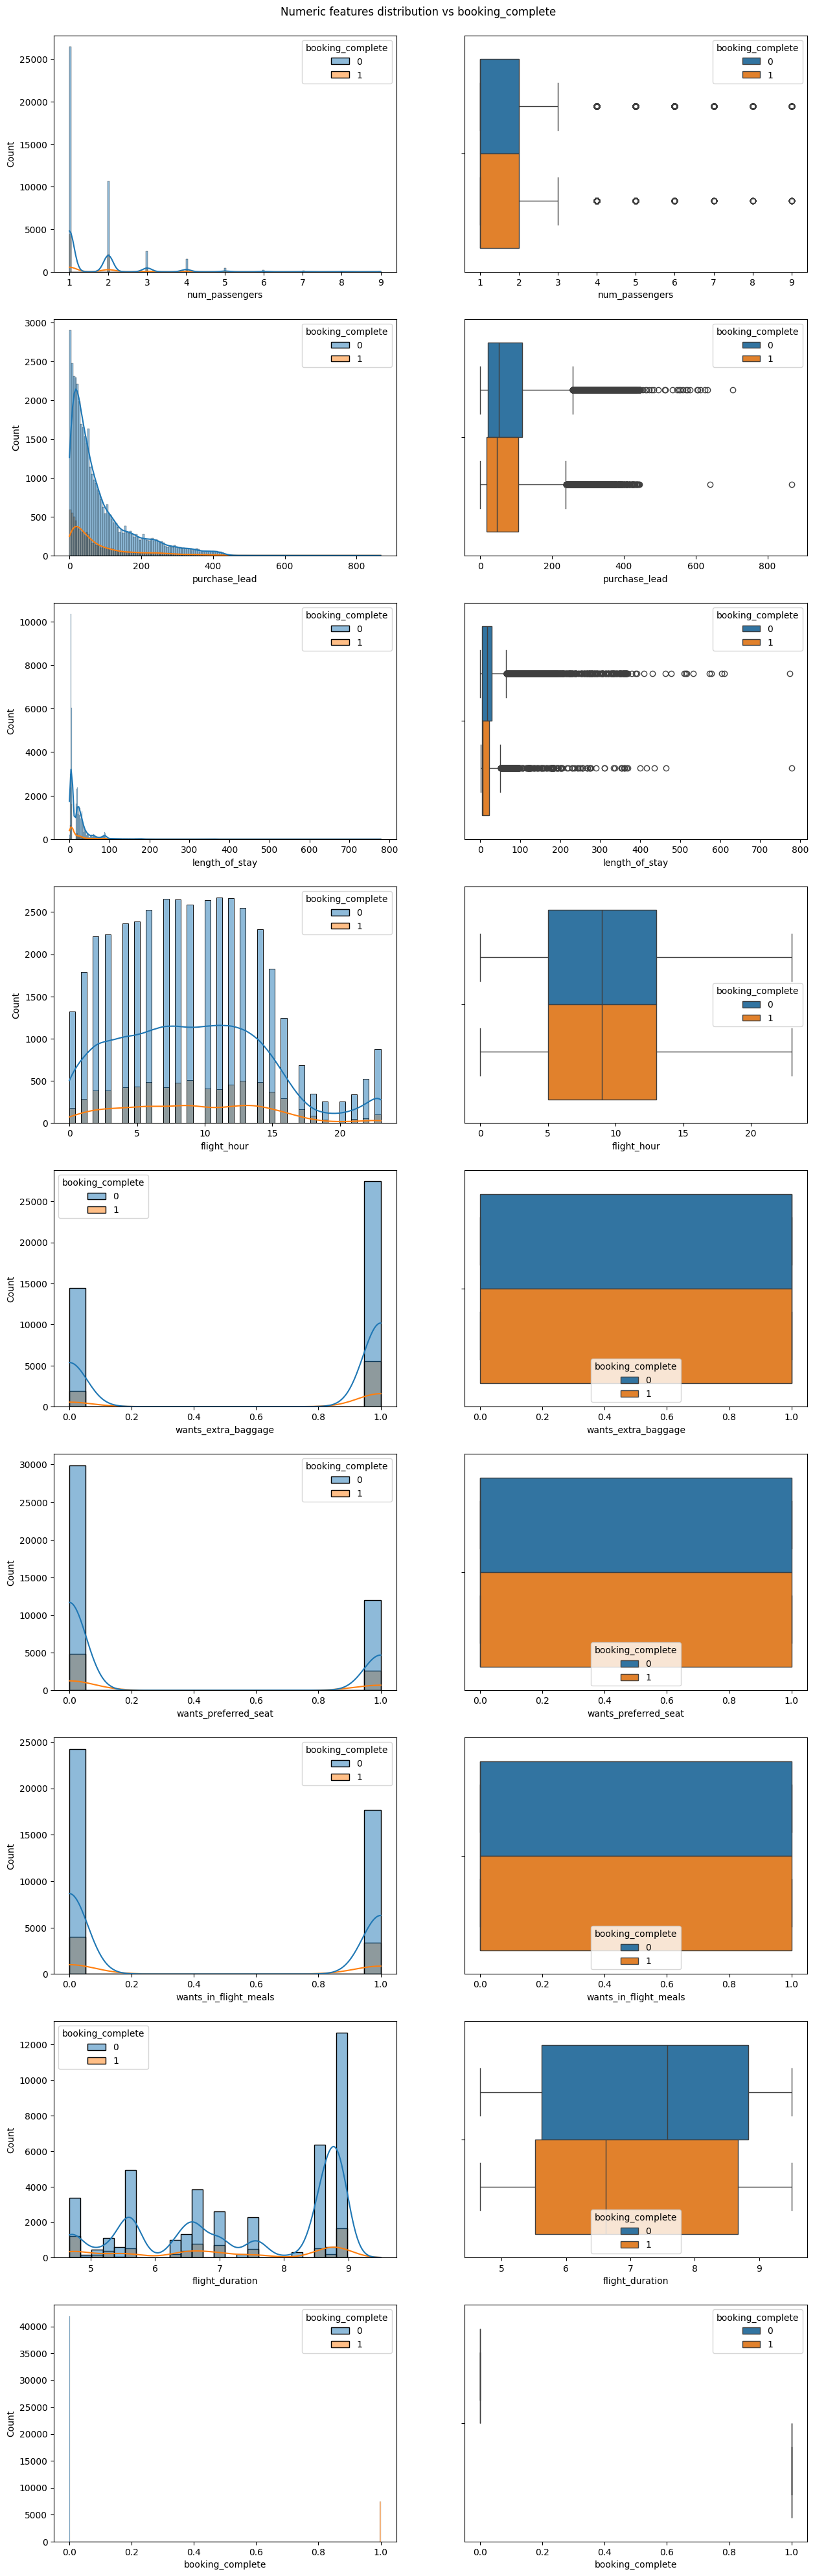

In [29]:
fig, axes = plt.subplots(nrows=len(numeric_data.columns), ncols=2, figsize=(15,5*len(numeric_data.columns)))
for id, col in enumerate(numeric_data.columns):
    sns.histplot(x=numeric_data[col], hue=numeric_data['booking_complete'], kde=True, ax=axes[id][0])
    sns.boxplot(x=numeric_data[col], hue=numeric_data['booking_complete'], ax=axes[id][1])
plt.suptitle('Numeric features distribution vs booking_complete')
plt.subplots_adjust(top=0.97)
plt.show()

<font face=georgia color=white><h5><center>Outliers seen in 'num_passengers', 'purchase_lead', 'length_of_stay'

<font face=georgia color=yellow><h3><center>Outlier handling

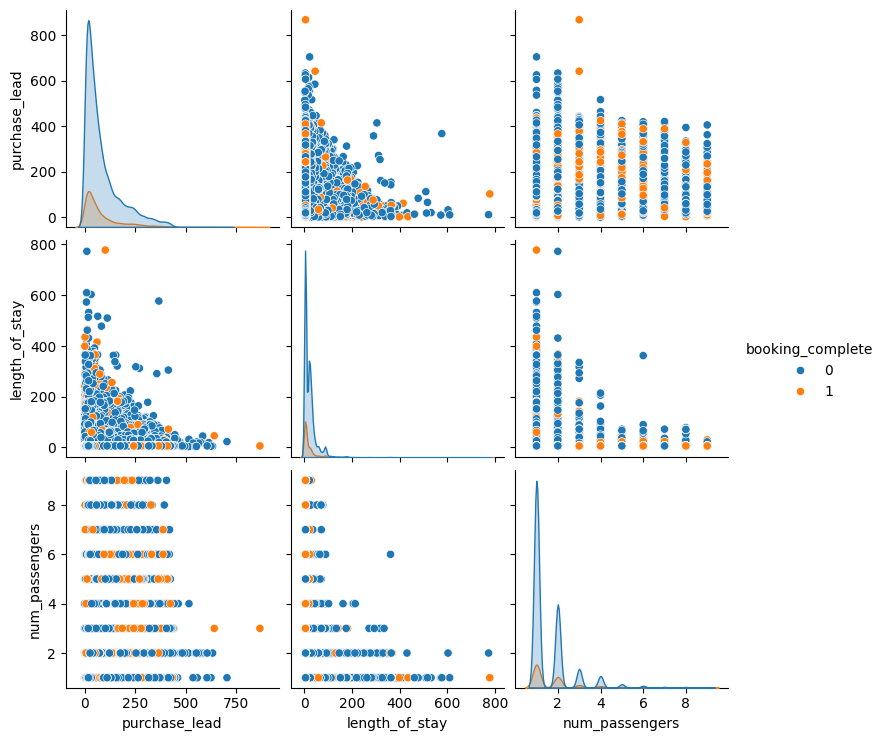

In [30]:
sns.pairplot(data=numeric_data[['purchase_lead', 'length_of_stay', 'num_passengers', 'booking_complete']], hue='booking_complete')
plt.show()

In [31]:
def remove_outliers(data, col, method):
    try:
        if col not in data.columns:
            raise Exception("Column not found in data.")
        
        if method == 'iqr':
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lb = Q1 - 1.5 * IQR
            ub = Q3 + 1.5 * IQR

        elif method == 'z-scr':
            mean = data[col].mean()
            std = data[col].std()
            lb = mean - 3 * std
            ub = mean + 3 * std

        elif method == 'perc':
            lb, ub = 0, np.percentile(data[col], 99.7)

        else:
            raise Exception("Invalid method")

        data = data[(data[col] > lb) & (data[col] < ub)]

    except Exception as e:
        print('Invalid method for outlier detection. Choose from (iqr, z-scr, perc).')
        print(f'Error: {e}')
    finally:
        return data

In [32]:
numeric_data = remove_outliers(numeric_data, 'purchase_lead','perc')
numeric_data = remove_outliers(numeric_data, 'length_of_stay','perc')
numeric_data = remove_outliers(numeric_data, 'num_passengers','perc')

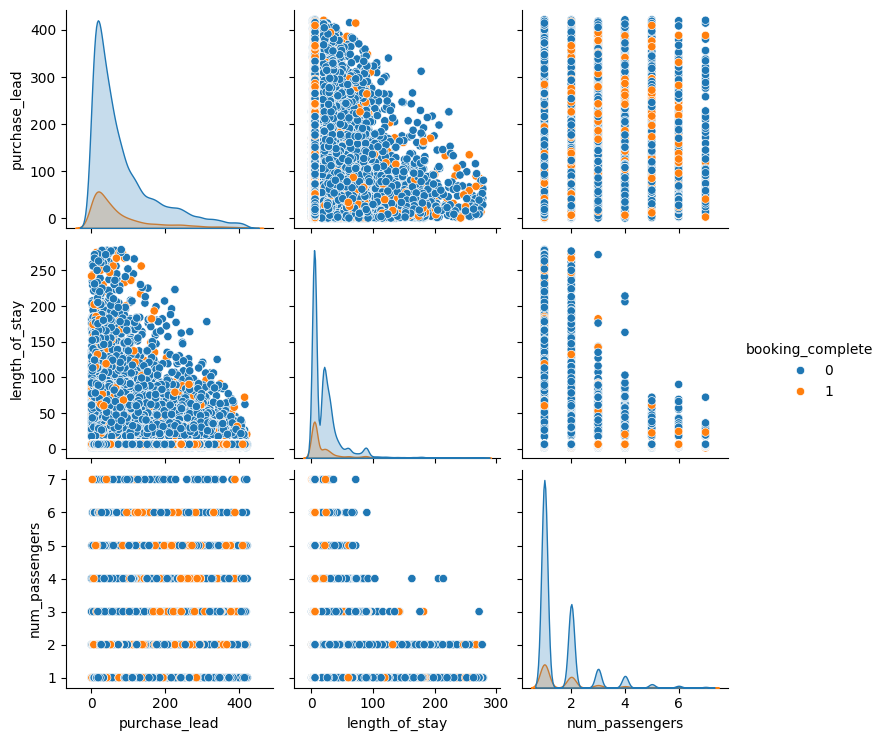

In [33]:
sns.pairplot(data=numeric_data[['purchase_lead', 'length_of_stay', 'num_passengers', 'booking_complete']], hue='booking_complete')
plt.show()

In [34]:
print('New shape : ', numeric_data.shape)
numeric_data.head()

New shape :  (48457, 9)


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0


<font face=georgia color=magenta><h1><center>Feature Engineering - 2

In [35]:
numeric_data['flight_destination_time'] = numeric_data['flight_hour']+numeric_data['flight_duration']
numeric_data['flight_reachhour'] = np.where(numeric_data['flight_destination_time'] >= 24, numeric_data['flight_destination_time'] - 24, numeric_data['flight_destination_time'])
print('Numeric data shape : ', numeric_data.shape)
numeric_data.head()

Numeric data shape :  (48457, 11)


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_destination_time,flight_reachhour
0,2,262,19,7,1,0,0,5.52,0,12.52,12.52
1,1,112,20,3,0,0,0,5.52,0,8.52,8.52
2,2,243,22,17,1,1,0,5.52,0,22.52,22.52
3,1,96,31,4,0,0,1,5.52,0,9.52,9.52
4,2,68,22,15,1,0,1,5.52,0,20.52,20.52


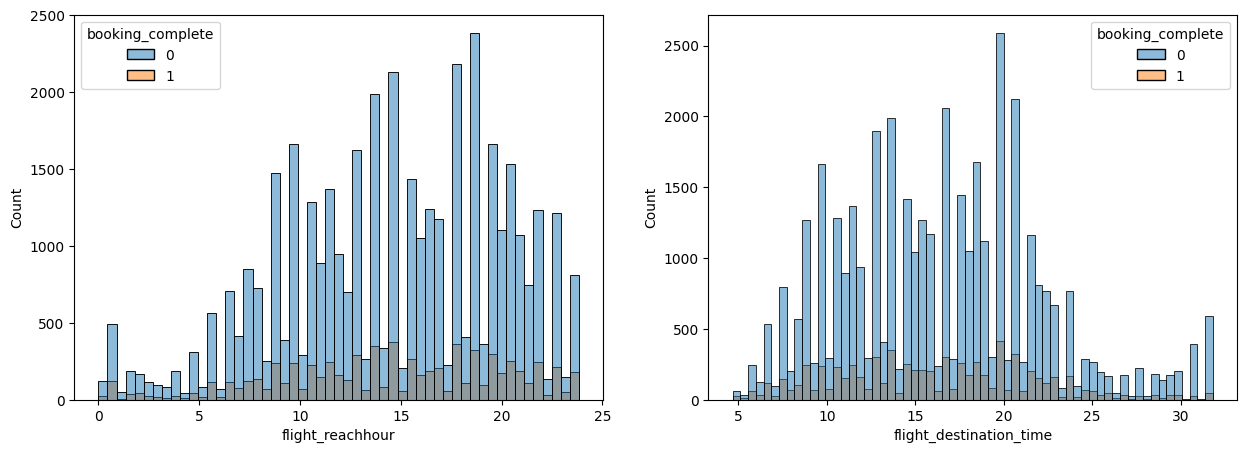

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.histplot(x=numeric_data['flight_reachhour'], hue=numeric_data['booking_complete'], ax=axes[0])
sns.histplot(x=numeric_data['flight_destination_time'], hue=numeric_data['booking_complete'], axes=axes[1])
plt.show()

In [37]:
categoric_data = categoric_data.loc[numeric_data.index]
categoric_data['flight_reachday'] = np.where(numeric_data['flight_destination_time'] >= 24, 'Next day', 'Same day')
print('Categoric data shape : ', categoric_data.shape)
categoric_data.head()

Categoric data shape :  (48457, 6)


,sales_channel,flight_day,booking_origin,flight_from_region,flight_to_region,flight_reachday
0,Internet,Sat,Oceania,Oceania,Asia,Same day
1,Internet,Sat,Oceania,Oceania,Asia,Same day
2,Internet,Wed,Asia,Oceania,Asia,Same day
3,Internet,Sat,Oceania,Oceania,Asia,Same day
4,Internet,Wed,Asia,Oceania,Asia,Same day


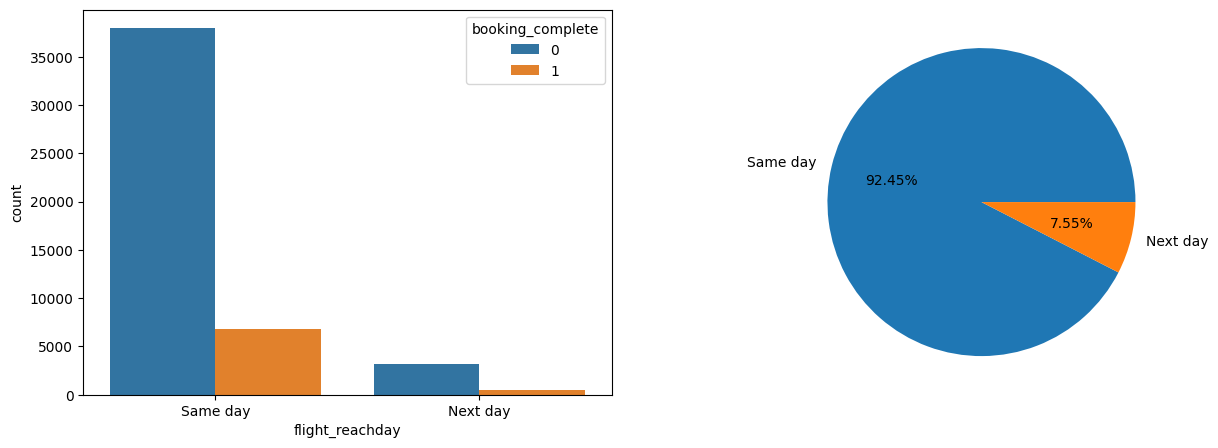

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(x=categoric_data['flight_reachday'], hue=numeric_data['booking_complete'],ax=axes[0])
axes[1].pie(x=categoric_data['flight_reachday'].value_counts().values, labels=categoric_data['flight_reachday'].value_counts().keys(), autopct='%.2f%%')
plt.show()

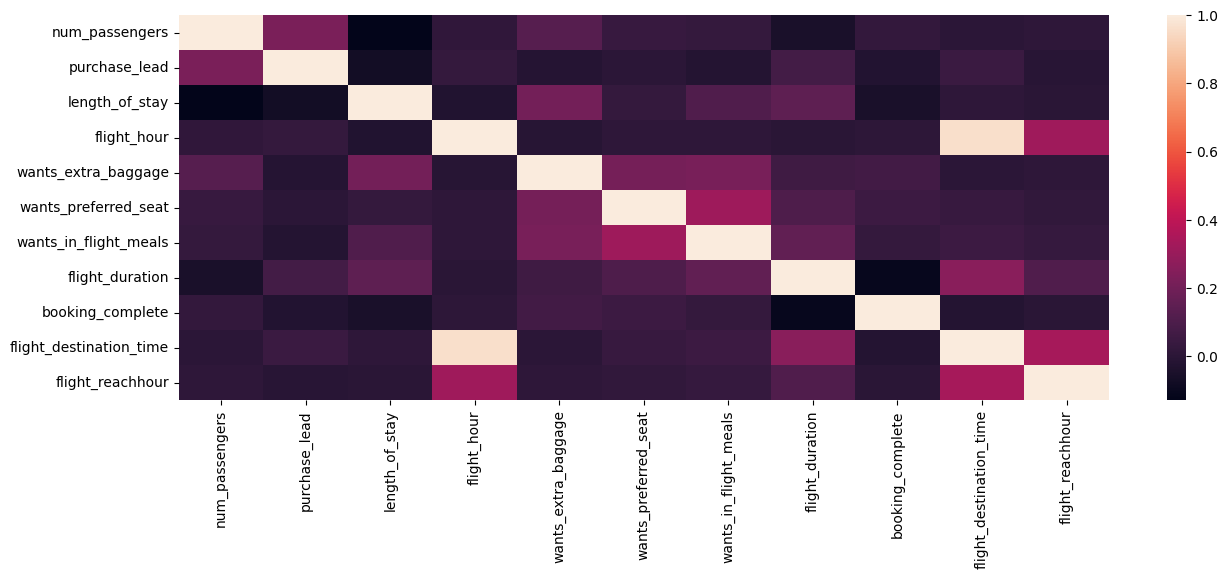

In [39]:
plt.figure(figsize=(15,5))
sns.heatmap(numeric_data.corr())
plt.show()

<font face=georgia color=yellow><h3><center>Dropping features causing Multicollinearity

In [40]:
numeric_data = numeric_data.drop(columns=['flight_destination_time'])
print('New shape : ', numeric_data.shape)
numeric_data.head()

New shape :  (48457, 10)


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_reachhour
0,2,262,19,7,1,0,0,5.52,0,12.52
1,1,112,20,3,0,0,0,5.52,0,8.52
2,2,243,22,17,1,1,0,5.52,0,22.52
3,1,96,31,4,0,0,1,5.52,0,9.52
4,2,68,22,15,1,0,1,5.52,0,20.52


<font face=georgia color=yellow><h3><center>Encoding Categoric features

In [41]:
categoric_data['sales_channel'] = categoric_data['sales_channel'].map({'Internet' : 0, 'Mobile' : 1})
categoric_data['flight_reachday'] = categoric_data['flight_reachday'].map({'Same day':0, 'Next day':1})
categoric_data['flight_day'] = categoric_data['flight_day'].map({'Mon':1, 'Tue':2, 'Wed':3, 'Thu':4, 'Fri':5, 'Sat':6, 'Sun':7})

categoric_data

,sales_channel,flight_day,booking_origin,flight_from_region,flight_to_region,flight_reachday
0,0,6,Oceania,Oceania,Asia,0
1,0,6,Oceania,Oceania,Asia,0
2,0,3,Asia,Oceania,Asia,0
3,0,6,Oceania,Oceania,Asia,0
4,0,3,Asia,Oceania,Asia,0
...,...,...,...,...,...,...
49995,0,6,Oceania,Oceania,Asia,0
49996,0,7,Oceania,Oceania,Asia,0
49997,0,6,Oceania,Oceania,Asia,1
49998,0,1,Oceania,Oceania,Asia,0


In [42]:
ohe_encoder1 = OneHotEncoder()
encoded_array = ohe_encoder1.fit_transform(categoric_data[['booking_origin']])

encoded_df1 = pd.DataFrame(
    encoded_array.toarray(), 
    columns=ohe_encoder1.get_feature_names_out(['booking_origin']),
    index=categoric_data.index
)
encoded_df1 = encoded_df1.drop(columns=['booking_origin_Other'])
encoded_df1

,booking_origin_Asia,booking_origin_Europe,booking_origin_North America,booking_origin_Oceania
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
49995,0.0,0.0,0.0,1.0
49996,0.0,0.0,0.0,1.0
49997,0.0,0.0,0.0,1.0
49998,0.0,0.0,0.0,1.0


In [43]:
categoric_data['booking_origin'].unique()

array(['Oceania', 'Asia', 'Europe', 'Other', 'North America'],
      dtype=object)

In [44]:
ohe_encoder2 = OneHotEncoder(drop='first')
encoded_array = ohe_encoder2.fit_transform(categoric_data[['flight_from_region']])

encoded_df2 = pd.DataFrame(
    encoded_array.toarray(), 
    columns=ohe_encoder2.get_feature_names_out(['flight_from_region']),
    index=categoric_data.index
)
encoded_df2

,flight_from_region_Asia,flight_from_region_Oceania
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
49995,0.0,1.0
49996,0.0,1.0
49997,0.0,1.0
49998,0.0,1.0


In [45]:
categoric_data['flight_from_region'].unique()

array(['Oceania', 'Asia', 'Africa'], dtype=object)

In [46]:
categoric_data = categoric_data.drop(columns=['flight_from_region'])
categoric_data['flight_from_region'] = categoric_data['flight_to_region']
encoded_array = ohe_encoder2.transform(categoric_data[['flight_from_region']])

encoded_df3 = pd.DataFrame(
    encoded_array.toarray(), 
    columns=ohe_encoder2.get_feature_names_out(['flight_from_region']),
    index=categoric_data.index
)

encoded_df3.rename(columns={'flight_from_region_Asia' : 'flight_to_region_Asia', 'flight_from_region_Oceania':'flight_to_region_Oceania'}, inplace=True)
encoded_df3

,flight_to_region_Asia,flight_to_region_Oceania
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
49995,1.0,0.0
49996,1.0,0.0
49997,1.0,0.0
49998,1.0,0.0


In [47]:
categoric_data['flight_to_region'].unique()

array(['Asia', 'Africa', 'Oceania'], dtype=object)

In [48]:
encoded_df5 = categoric_data[['sales_channel', 'flight_reachday', 'flight_day']]
encoded_df5

,sales_channel,flight_reachday,flight_day
0,0,0,6
1,0,0,6
2,0,0,3
3,0,0,6
4,0,0,3
...,...,...,...
49995,0,0,6
49996,0,0,7
49997,0,1,6
49998,0,0,1


In [49]:
concat_df = pd.concat([numeric_data, encoded_df1, encoded_df2, encoded_df3, encoded_df5], axis=1)
concat_df.reset_index(inplace=True, drop='index')
concat_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_reachhour,...,booking_origin_Europe,booking_origin_North America,booking_origin_Oceania,flight_from_region_Asia,flight_from_region_Oceania,flight_to_region_Asia,flight_to_region_Oceania,sales_channel,flight_reachday,flight_day
0,2,262,19,7,1,0,0,5.52,0,12.52,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,6
1,1,112,20,3,0,0,0,5.52,0,8.52,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,6
2,2,243,22,17,1,1,0,5.52,0,22.52,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,3
3,1,96,31,4,0,0,1,5.52,0,9.52,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,6
4,2,68,22,15,1,0,1,5.52,0,20.52,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48452,2,27,6,9,1,0,1,5.62,0,14.62,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,6
48453,1,111,6,4,0,0,0,5.62,0,9.62,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,7
48454,1,24,6,22,0,0,1,5.62,0,3.62,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,6
48455,1,15,6,11,1,0,1,5.62,0,16.62,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,1


<font face=georgia color=yellow><h3><center>Oversampling - Handling Class Imbalance

In [50]:
borderline_smote = BorderlineSMOTE(random_state=42)
independent_var, target_var = borderline_smote.fit_resample(concat_df.drop(columns=['booking_complete']), concat_df['booking_complete'])


print(f"Resampled shape: {independent_var.shape}")
print(f"Resampled class distribution: {pd.Series(target_var).value_counts()}")

Resampled shape: (82344, 20)
Resampled class distribution: booking_complete
0    41172
1    41172
Name: count, dtype: int64


In [51]:
resampled_df = pd.concat([independent_var, target_var], axis=1)
df_shuffled = resampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
df_shuffled

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,flight_reachhour,booking_origin_Asia,...,booking_origin_North America,booking_origin_Oceania,flight_from_region_Asia,flight_from_region_Oceania,flight_to_region_Asia,flight_to_region_Oceania,sales_channel,flight_reachday,flight_day,booking_complete
0,1,130,24,0,1,0,0,8.830000,8.830000,0.000000,...,0.0,1.000000,1.0,0.0,0.000000,1.000000,0,0,2,0
1,2,137,5,3,1,0,0,7.657493,11.577954,1.000000,...,0.0,0.000000,1.0,0.0,1.000000,0.000000,0,0,4,1
2,4,75,4,7,1,0,0,7.508289,15.203924,1.000000,...,0.0,0.000000,1.0,0.0,1.000000,0.000000,0,0,6,1
3,1,17,18,0,1,0,0,5.620000,5.620000,0.000000,...,0.0,1.000000,1.0,0.0,0.000000,1.000000,0,0,5,0
4,1,3,52,4,1,0,1,8.580000,12.580000,0.000000,...,0.0,1.000000,1.0,0.0,0.000000,1.000000,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82339,2,61,30,3,1,0,1,8.830000,11.830000,0.000000,...,0.0,1.000000,1.0,0.0,0.000000,1.000000,0,0,2,0
82340,1,201,22,11,0,0,0,8.762320,19.869749,0.053714,...,0.0,0.946286,1.0,0.0,0.053714,0.946286,0,0,1,1
82341,1,107,4,6,1,0,0,6.156296,12.442533,1.000000,...,0.0,0.000000,1.0,0.0,1.000000,0.000000,0,0,1,1
82342,1,109,20,5,1,0,1,8.830000,13.830000,1.000000,...,0.0,0.000000,0.0,1.0,1.000000,0.000000,0,0,2,0


<font face=georgia color=yellow><h3><center>Splitting dependent and independent variables

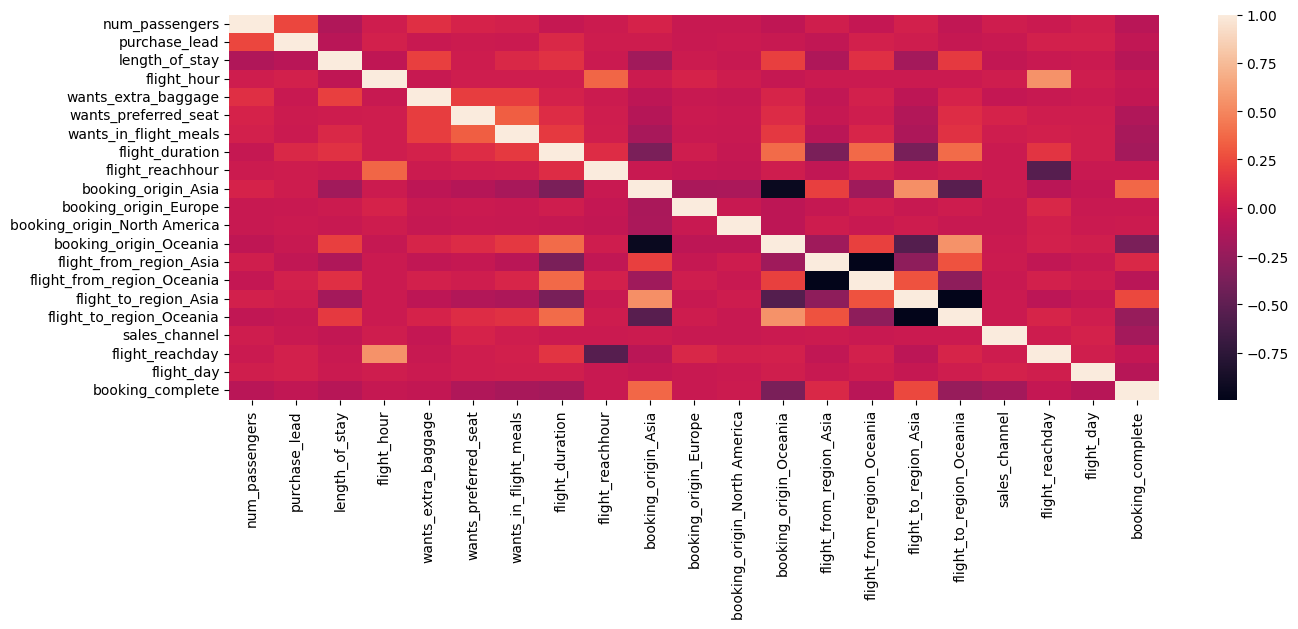

In [52]:
plt.figure(figsize=(15,5))
sns.heatmap(df_shuffled.corr())
plt.show()

In [53]:
X = df_shuffled.drop(columns=['booking_complete'])
Y = df_shuffled['booking_complete']
print('X shape : ',X.shape, 'Y shape : ',Y.shape)

X shape :  (82344, 20) Y shape :  (82344,)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}\ny_train shape: {y_train.shape}, y_test shape: {y_test.shape}')

X_train shape: (65875, 20), X_test shape: (16469, 20)
y_train shape: (65875,), y_test shape: (16469,)


<font face=georgia color=yellow><h3><center>Scaling features

In [55]:
scaler = MinMaxScaler((0,1))
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

<font face=georgia color=yellow><h3><center>PCA - Dimensionality Reduction

In [56]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled) 
# print('X_train_pca shape : ', X_train_pca.shape, 'X_test_pca shape : ', X_test_pca.shape)

<font face=georgia color=magenta><h1><center>Model Training

In [57]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 32903, number of negative: 32972
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3076
[LightGBM] [Info] Number of data points in the train set: 65875, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced', random_state=42)

In [58]:
y_train.value_counts()

booking_complete
0    32972
1    32903
Name: count, dtype: int64

In [59]:
y_pred = lgbm.predict(X_test_scaled)
y_pred

c:\Users\antho\OneDrive\Desktop\N2\AI\Git_repositories\Forage-British_Airways_Job_Simulation_Projects\ba_airways_jobsim\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 1, ..., 1, 0, 1], shape=(16469,))

<font face=georgia color=magenta><h1><center>Model Evaluation

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      8200
           1       0.93      0.79      0.85      8269

    accuracy                           0.86     16469
   macro avg       0.87      0.87      0.86     16469
weighted avg       0.87      0.86      0.86     16469



In [61]:
print('ROC_AUC_SCORE : ', round(roc_auc_score(y_test, y_pred), 2))

ROC_AUC_SCORE :  0.87


<font face=georgia color=magenta><h1><center> Hyperparameter Tuning

In [62]:
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],      
    'max_depth': [3, 7, 12],              
    'learning_rate': [0.05, 0.1, 0.2],    
    'num_leaves': [31, 63, 103]           
}
grid = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    n_iter=50, 
    scoring='f1',   
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42 
)

grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best F1 score:", grid.best_score_)

best_model = grid.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 32903, number of negative: 32972
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3076
[LightGBM] [Info] Number of data points in the train set: 65875, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best parameters: {'num_leaves': 103, 'n_estimators': 300, 'max_depth': 12, 'learning_rate': 0.2}
Best F1 score: 0.8891658229818524


In [63]:
y_pred = best_model.predict(X_test_scaled)
y_pred

c:\Users\antho\OneDrive\Desktop\N2\AI\Git_repositories\Forage-British_Airways_Job_Simulation_Projects\ba_airways_jobsim\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 1, ..., 1, 0, 1], shape=(16469,))

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      8200
           1       0.94      0.86      0.90      8269

    accuracy                           0.90     16469
   macro avg       0.90      0.90      0.90     16469
weighted avg       0.90      0.90      0.90     16469



In [65]:
print('ROC_AUC_SCORE : ', round(roc_auc_score(y_test, y_pred), 2))

ROC_AUC_SCORE :  0.9


<font face=georgia color=yellow><h3><center>Visualizing Feature Importances

In [66]:
feature_importances = pd.DataFrame()
feature_importances['Feature'] = X_train.columns 
feature_importances['Importance'] = best_model.feature_importances_
total = sum(feature_importances['Importance'])
feature_importances['Importance'] = feature_importances['Importance']/total
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
1,purchase_lead,0.265572
8,flight_reachhour,0.163064
2,length_of_stay,0.145767
7,flight_duration,0.105810
19,flight_day,0.091162
3,flight_hour,0.073472
0,num_passengers,0.035837
6,wants_in_flight_meals,0.025929
5,wants_preferred_seat,0.022790
4,wants_extra_baggage,0.021417


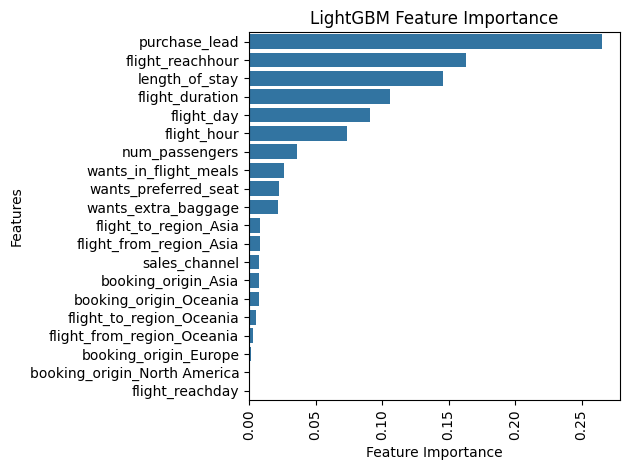

In [70]:
# plt.figure(figsize=(10,9))
sns.barplot(y=feature_importances['Feature'], x=feature_importances['Importance'])
plt.xticks(rotation=90)
plt.ylabel('Features')
plt.xlabel('Feature Importance')  
plt.title('LightGBM Feature Importance')
plt.tight_layout()
plt.show()

In [68]:
sum(feature_importances['Importance'])

1.0